             meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-04-05  32.312500  29.312500    9.268750   1007.000000
2016-04-06  31.375000  33.125000    3.475000   1006.875000
2016-04-07  29.933333  37.000000   10.850000   1007.266667
2016-04-08  29.266667  36.000000    4.686667   1009.200000
2016-04-09  30.733333  32.466667   12.618750   1009.312500


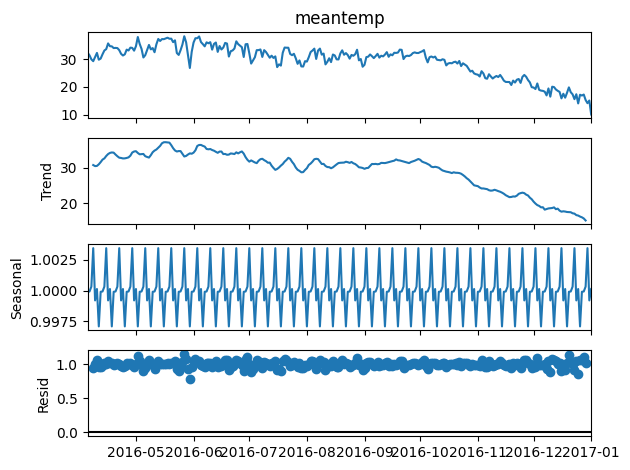

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
   
df = pd.read_csv('ARIMAdata.csv', 
                       index_col ='date', 
                       parse_dates = True) 

# Handle missing values by forward fill
df['meantemp'].fillna(method='ffill', inplace=True)

print(df.head()) 
  
# ETS Decomposition 
result = seasonal_decompose(df['meantemp'],  
                            model ='multiplicative') 
  
# ETS plot  
result.plot()
plt.show()


In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df['meantemp'])

# Extract and print results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpret results
if adf_result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: 2.4259464637357286
p-value: 0.9990220018158342
Critical Values:
   1%: -3.4558530692911504
   5%: -2.872764881778665
   10%: -2.572751643088207
The series is not stationary.


In [6]:
if adf_result[1] > 0.05:
    # Compute first-order difference
    df['diff_meantemp'] = df['meantemp'].diff()
    
    # Drop the first NaN value resulting from differencing
    df.dropna(inplace=True)
    
    # Check the stationarity of the differenced series
    adf_result_diff = adfuller(df['diff_meantemp'])
    
    # Print ADF test results for the differenced series
    print('\nAfter differencing:')
    print('ADF Statistic:', adf_result_diff[0])
    print('p-value:', adf_result_diff[1])
    print('Critical Values:')
    for key, value in adf_result_diff[4].items():
        print(f'   {key}: {value}')

    # Interpret ADF test results for the differenced series
    if adf_result_diff[1] <= 0.05:
        print("The differenced series is stationary.")
    else:
        print("The differenced series is still not stationary.")


After differencing:
ADF Statistic: -7.60680461046923
p-value: 2.3106897561726767e-11
Critical Values:
   1%: -3.4558530692911504
   5%: -2.872764881778665
   10%: -2.572751643088207
The differenced series is stationary.


In [7]:
# Import the library
from pmdarima import auto_arima
import pandas as pd

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to YOUR dataset
stepwise_fit = auto_arima(df['meantemp'], m=12, seasonal=True, 
                          d=None, D=1, trace=True, 
                          error_action='ignore', suppress_warnings=True, 
                          stepwise=True)

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1006.744, Time=3.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1168.841, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1102.857, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1035.636, Time=0.42 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1004.964, Time=2.86 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1006.720, Time=6.85 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1067.508, Time=1.72 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1008.871, Time=8.20 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1013.436, Time=0.77 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1012.969, Time=1.19 sec
 ARIMA(3,1,2)(0,1,1)[12]             : AIC=1013.617, Time=1.42 sec
 ARIMA(2,1,3)(0,1,1)[12]             : AIC=1009.852, Time=1.70 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1012.498, Time=0.69 sec
 ARIMA(1,1,3)(0,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  271
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -496.482
Date:                              Tue, 30 Apr 2024   AIC                           1004.964
Time:                                      00:52:29   BIC                           1026.282
Sample:                                  04-06-2016   HQIC                          1013.536
                                       - 01-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6121      0.057     28.355      0.000       1.501       1.724
ar.L2         -0.6657      0.058    -11.387      0.000      -0.780      -0.551
ma.L1         -1.9383      0.031    -61.954      0.000      -2.000      -1.877
ma.L2          0.9615      0.030     32.002      0.000       0.903       1.020
ma.S.L12      -0.8690      0.057    -15.131      0.000      -0.982      -0.756
sigma2         2.5642      0.212     12.119      0.000       2.150       2.979
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.84
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               0.60   Skew:                            -0.35
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

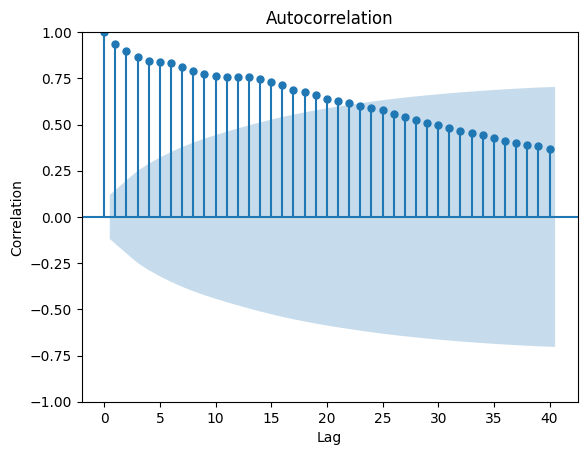

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plot_acf(df['meantemp'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [13]:
# Split data into train / test sets 
# train = df.iloc[:len(df)-12] 
# test = df.iloc[len(df)-12:] # set one year(12 DATEs) for testing 

# Calculate the length of the dataset
total_length = len(df)

# Calculate the index to split the data
split_index = int(0.8 * total_length)

# Split data into train / test sets 
train = df.iloc[:split_index] 
test = df.iloc[split_index:]
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['meantemp'],  
                order = (2,1,2),  
                seasonal_order =(2, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            meantemp   No. Observations:                  216
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 12)   Log Likelihood                -410.589
Date:                             Tue, 30 Apr 2024   AIC                            835.179
Time:                                     00:53:20   BIC                            858.371
Sample:                                 04-06-2016   HQIC                           844.561
                                      - 11-07-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9312      0.456      2.040      0.041       0.037       1.826
ar.L2         -0.3354      0.281     -1.193      0.233      -0.886       0.216
ma.L1         -1.1620      0.478     -2.431      0.015      -2.099      -0.225
ma.L2          0.2564      0.451      0.569      0.569      -0.627       1.140
ar.S.L12      -0.5757      0.068     -8.514      0.000      -0.708      -0.443
ar.S.L24      -0.2964      0.067     -4.417      0.000      -0.428      -0.165
sigma2         3.2496      0.279     11.668      0.000       2.704       3.795
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 5.42
Prob(Q):                              0.74   Prob(JB):                         0.07
Heteroskedasticity (H):               0.34   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

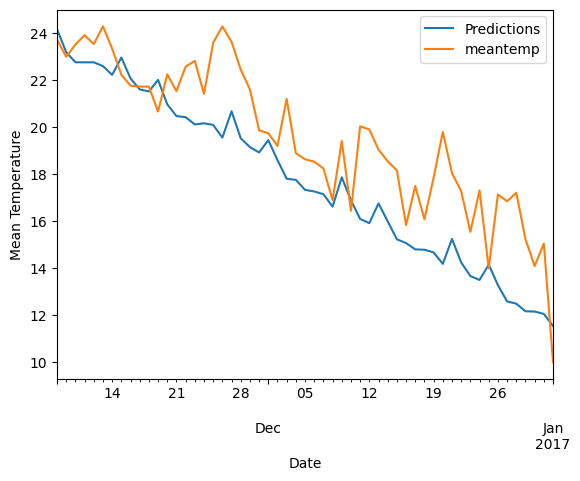

In [16]:
import matplotlib.pyplot as plt
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['meantemp'].plot(legend = True) 

# Set labels for x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('Mean Temperature')

plt.show()


In [17]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["meantemp"], predictions) 

2.4221056656358377

<Axes: xlabel='date'>

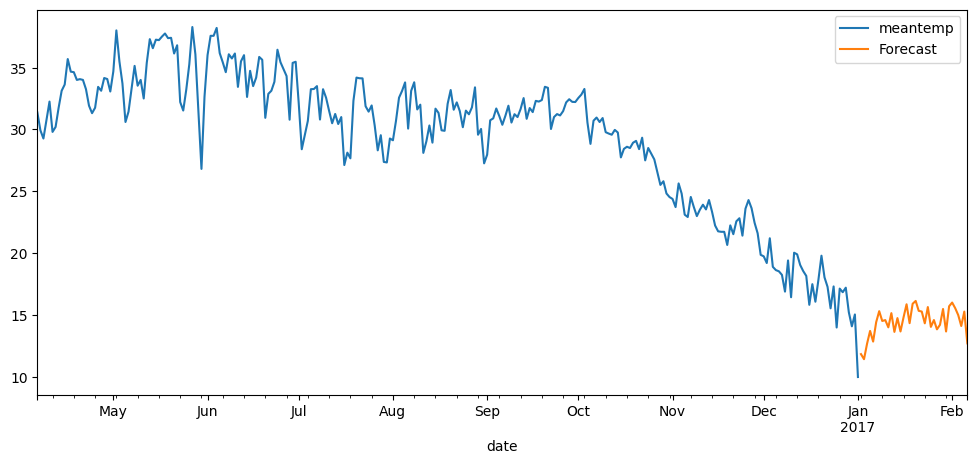

In [18]:
# Train the model on the full dataset 
model = model = SARIMAX(df['meantemp'],  
                        order = (2, 0, 0),  
                        seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df['meantemp'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 